# Preprocesamiento y exploración de los datos

Una vez cargados los datos en el ambiente de Python (archivo data_loading.py o data_loading.ipynb) se realizará el debido preprocesamiento de estos junto con una primera exploración de los mismos para encontrar algunas de características que resulten útiles para la posterior implementación de modelos de aprendizaje automático.

En primer lugar, se importan las librerías necesarias para este script, así como el archivo .py de la adquisición de los datos

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import data_loading as data

Downloading...
From: https://drive.google.com/uc?export=download&id=1oOgj9f5UTITTDzMehEIIzNz2aoR2IlgZ
To: /content/stars.csv
100%|██████████| 8.48k/8.48k [00:00<00:00, 7.42MB/s]


A continuación se usa la función *dataload* definida en el script de carga de datos para obtener los datos a partir del link que contiene el archivo

In [3]:
link = 'https://drive.google.com/uc?export=download&id=1oOgj9f5UTITTDzMehEIIzNz2aoR2IlgZ'
name = 'stars.csv'
df_stars = data.dataload(link, name)

Downloading...
From: https://drive.google.com/uc?export=download&id=1oOgj9f5UTITTDzMehEIIzNz2aoR2IlgZ
To: /content/stars.csv
100%|██████████| 8.48k/8.48k [00:00<00:00, 7.02MB/s]


Verificamos que se hizo una correcta carga de los datos mostrando algunos datos del dataframe

In [4]:
df_stars.head(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


Antes de continuar, se guardan en un diccionario las etiquetas para cada tipo de estrella, las variables a predecir en los modelos posteriores

In [5]:
Nombres = {0:'Brown Dwarf',1:'Red Dwarf',2:'White Dwarf',3:'Main Sequence',4:'Supergiant',5:'Hypergiant'}

Una de las primeras acciones a realizar con los datos es conocer la naturaleza de estos, para lo que vemos el tipo de variable de cada columna y la posible existencia de datos faltantes

In [6]:
df_stars.dtypes

Temperature (K)             int64
Luminosity(L/Lo)          float64
Radius(R/Ro)              float64
Absolute magnitude(Mv)    float64
Star type                   int64
Star color                 object
Spectral Class             object
dtype: object

In [7]:
df_stars.isna().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

Lo anterior deja ver que no existen datos faltantes, por lo que no habrá necesidad de eliminación de filas o columnas de datos ni imputación de estos. Por otro lado, existen 2 variables tipo 'object' que como se verá más adelante corresponden a variables categóricas.

Continuando con características generales del dataframe, observamos algunas cantidades estadísticas de cada columna

In [8]:
df_stars.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


Así mismo, una herramienta útil para descubrir posibles relaciones entre las variables es haciendo un mapa de calor de las correlaciones entre cada columna como se ve en la siguiente figura

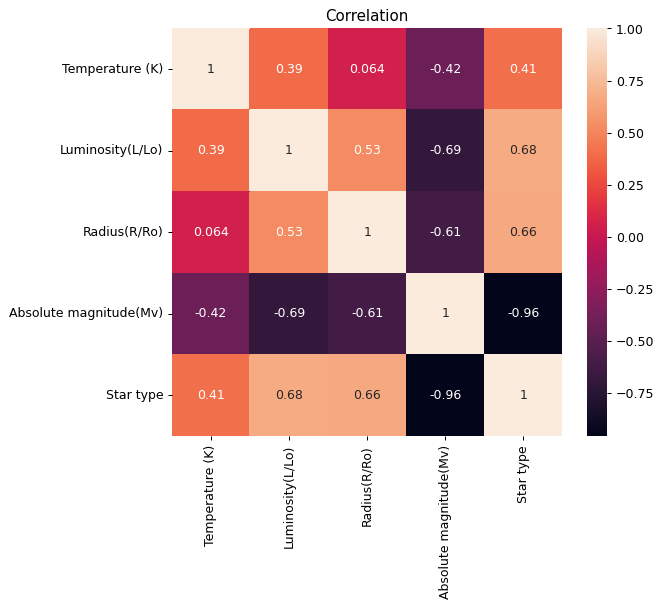

In [9]:
fig, ax = plt.subplots(figsize = (7, 6), dpi = 90)
cor = sns.heatmap(df_stars.corr(), xticklabels=df_stars.corr().columns, yticklabels=df_stars.corr().columns,annot = True, ax = ax)
cor.set_title('Correlation');
#plt.savefig('Images/HeatMapCorrelation.png', bbox_inches='tight')
plt.show();
plt.close();

Una alta correlación negativa se observa entre las cantidades de la magnitud absoluta y el tipo de estrella. Así mismo, hay otros 4 pares de variables con una correlación absoluta mayor a 0.6, que también deben considerarse.

Por otro lado, observar la distribución de los datos respecto a la variable objetivo de los futuros modelos es importante, para lo cual se realiza la gráfica siguiente

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


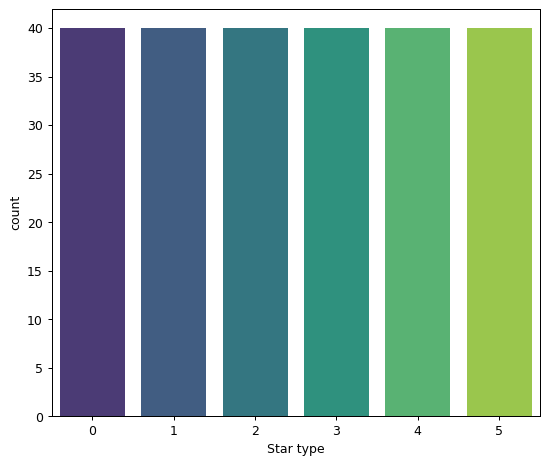

In [10]:
fig, ax = plt.subplots(figsize = (7, 6), dpi = 90)
sns.countplot(df_stars['Star type'], palette = "viridis", ax = ax);

Dejando ver una distribución aparentemente perfecta de esta variable. Así mismo, es posible comparar el diagrama de Hertzprung Russell obtenido con las estrellas de este conjunto de datos con el diagrama habitual, mostrado a continuación

<img src=https://upload.wikimedia.org/wikipedia/commons/6/6b/HRDiagram.png>

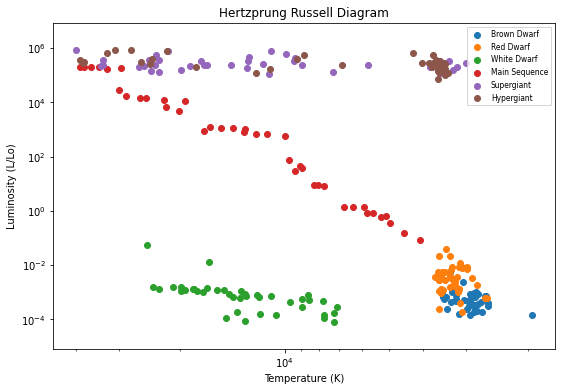

In [21]:
fig, ax = plt.subplots(1, figsize=(9,6))
GroupedData = df_stars.groupby('Star type')
for GroupName,group in GroupedData:
    ax.scatter(group['Temperature (K)'], group['Luminosity(L/Lo)'],label = Nombres[GroupName])
ax.legend(fontsize = 7.5)
ax.set_xlabel("Temperature (K)")
ax.set_ylabel("Luminosity (L/Lo)")
ax.set_ylim(0.1*df_stars['Luminosity(L/Lo)'].min(),10*df_stars['Luminosity(L/Lo)'].max())
ax.set_title('Hertzprung Russell Diagram')
plt.xscale('log')
plt.yscale('log')
ax.invert_xaxis()
plt.show()
plt.close()

Al observar las dos imágenes puede apreciarse la similitud entre ellas; a pesar de que no se vean del todo idénticas, los tipos de estrellas están ubicadas en las regiones correctas del diagrama. Ahora, se analizarán las variables tipo 'object' encontradas más atrás, para lo cual se inicia con su verificación como variables categóricas

In [13]:
df_stars['Spectral Class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [14]:
df_stars['Star color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

La columna 'Spectral Class' está debidamente organizada, sin embargo, 'Star Color' posee varios colores iguales escritos de maneras distintas, cosa que debe corregirse. La siguiente es una figura que muestra la problemática que tiene dicha columna

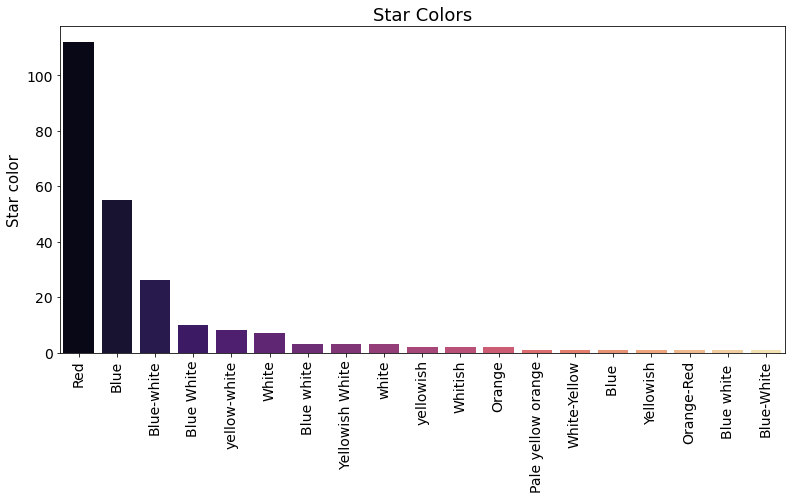

In [15]:
plt.figure(figsize = (13, 6))
color = pd.DataFrame(df_stars['Star color'].value_counts().sort_values(ascending=False))
ax = sns.barplot(x = color.index, y = 'Star color' , data = color, palette='magma')
plt.title("Star Colors", fontsize = 18)
plt.ylabel('Star color', fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

Debido a lo anterior, una posible solución consistiría en definir una función que cambie todos los colores 'repetidos' por uno solo, para posteriormente hacer uso de one hot encoding para estas variables categóricas. Sin embargo, por mayor simplicidad en el modelo a construir, se realizará la separación entre las variables del modelo y la variable objetivo, así como se particionan los datos en entrenamiento y prueba y se hace un debido reescalamiento de los mismos

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def preprocess(df):
    df = df.copy()
    
    df = df.drop(['Star color', 'Spectral Class'], axis=1)

    # Separación de variables
    X = df.drop('Star type', axis=1)
    y = df['Star type']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=0)

    # Scale X
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

Los nuevos datos se guardan en variables correspondientes de entrenamiento y prueba para las variables y etiquetas del modelo. A continuación se muestran algunas de dichas variables y la variable objetivo

In [17]:
X_train, X_test, y_train, y_test = preprocess(df_stars)
X_train.head(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Color_Blue,Color_Blue White,Color_Orange,Color_Orange-Red,Color_Pale yellow orange,Color_Red,...,Color_Whitish,Color_Yellowish,Color_Yellowish White,Class_A,Class_B,Class_F,Class_G,Class_K,Class_M,Class_O
61,-0.710590,-0.607428,-0.458255,1.153147,-0.549841,-0.418121,-0.109764,0.0,-0.077382,1.036375,...,-0.077382,-0.109764,-0.223607,-0.324443,-0.456764,-0.27735,0.0,-0.13484,1.024100,-0.4279
210,1.368814,-0.532507,-0.446344,-0.799426,-0.549841,2.391652,-0.109764,0.0,-0.077382,-0.964901,...,-0.077382,-0.109764,-0.223607,-0.324443,2.189316,-0.27735,0.0,-0.13484,-0.976467,-0.4279
52,-0.666403,1.029405,1.824986,-1.323333,-0.549841,-0.418121,-0.109764,0.0,-0.077382,1.036375,...,-0.077382,-0.109764,-0.223607,-0.324443,-0.456764,-0.27735,0.0,-0.13484,1.024100,-0.4279
66,-0.764119,-0.607428,-0.458442,1.285781,-0.549841,-0.418121,-0.109764,0.0,-0.077382,1.036375,...,-0.077382,-0.109764,-0.223607,-0.324443,-0.456764,-0.27735,0.0,-0.13484,1.024100,-0.4279
26,-0.145838,-0.607428,-0.458603,0.893562,-0.549841,2.391652,-0.109764,0.0,-0.077382,-0.964901,...,-0.077382,-0.109764,-0.223607,3.082207,-0.456764,-0.27735,0.0,-0.13484,-0.976467,-0.4279


In [18]:
y_train.head(5)

61     0
210    3
52     5
66     0
26     2
Name: Star type, dtype: int64

Finalmente, guardamos los datos ya preprocesados, separados y ya listos para implementar modelos de aprendizaje automático como archivos .csv

In [19]:
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')